In [1]:
import madrigalWeb.madrigalWeb
import pylab
import numpy
import h5py
import datetime
import dateutil.parser
import re
%matplotlib inline

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2022"

maddat = madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

In [3]:
# instrument codes for Millstone Hill
instcodes={'MHO':30}

In [4]:
# start time
st=datetime.datetime(2013, 4, 17, 0,0)
et=datetime.datetime(2013, 4, 18, 0,0)

expList = maddat.getExperiments(instcodes['MHO'], 
                                st.year, st.month, st.day, st.hour, st.minute, st.second, 
                                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100195483
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195483
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/17apr13
name: ISWD Synoptic
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 4
startday: 17
starthour: 0
startmin: 8
startsec: 15
endyear: 2013
endmonth: 4
endday: 17
endhour: 22
endmin: 1
endsec: 26
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1566864104
access: 2
Madrigal version: 3.2

id: 100195481
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100195481
url: http://cedar.openmadrigal.org/madtoc/experiments5/2013/mlh/17apr13a
name: Van Allen Conjunction Az scan
siteid: 10
sitename: CEDAR
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 4
startday: 17
starthour: 22
startmin: 5
startsec: 35
endyear: 2013
endmonth: 4
endday: 18
endhour: 1
endmin: 57


In [5]:
# multiple experiments on this day; select the first one (regular ion line parameters)
thisExp = expList[0]

In [6]:
# Select the correct experiment file (Zenith single-pulse)
fileList = maddat.getExperimentFiles(thisExp.id)
thisFile=None
for file in fileList:
    if re.match('Zenith single-pulse',file.kindatdesc):
        print('Using: %s' % (file))
        thisFile=file
        break

Using: name: /opt/cedar3/experiments5/2013/mlh/17apr13/mlh130417i.002.hdf5
kindat: 3420
kindatdesc: Zenith single-pulse basic parameters
category: 1
status: Final
permission: 0
expId: 100195483
doi: https://w3id.org/cedar?experiment_list=experiments5/2013/mlh/17apr13&file_list=mlh130417i.002.hdf5



In [7]:
# Download the file (should end up in this folder)       
filename=thisFile.name
outfilename=thisFile.name.split('/')[-1]
result = maddat.downloadFile(filename,outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [8]:
# Load file and get data table
hz = h5py.File(outfilename,'r')
hztl = hz['Data']['Table Layout']

In [9]:
# Survey the radar pulse lengths in this experiment
print('Unique pulse lengths in sec: %s' % (list(set(hztl['pl']))))

Unique pulse lengths in sec: [0.00096, 0.00048]


In [10]:
# List variables available
print(hztl.dtype)

[('year', '<f8'), ('month', '<f8'), ('day', '<f8'), ('hour', '<f8'), ('min', '<f8'), ('sec', '<f8'), ('recno', '<f8'), ('kindat', '<f8'), ('kinst', '<f8'), ('ut1_unix', '<f8'), ('ut2_unix', '<f8'), ('range', '<f8'), ('pl', '<f8'), ('mdtyp', '<f8'), ('az1', '<f8'), ('az2', '<f8'), ('el1', '<f8'), ('el2', '<f8'), ('systmp', '<f8'), ('pnrmd', '<f8'), ('power', '<f8'), ('pulf', '<f8'), ('dtau', '<f8'), ('ipp', '<f8'), ('tfreq', '<f8'), ('vtx', '<f8'), ('dvtx', '<f8'), ('scntyp', '<f8'), ('cycn', '<f8'), ('posn', '<f8'), ('mresl', '<f8'), ('snp3', '<f8'), ('wchsq', '<f8'), ('gfit', '<f8'), ('fpi_dataqual', '<f8'), ('ti', '<f8'), ('dti', '<f8'), ('tr', '<f8'), ('dtr', '<f8'), ('popl', '<f8'), ('dpopl', '<f8'), ('ph+', '<f8'), ('dph+', '<f8'), ('fa', '<f8'), ('dfa', '<f8'), ('co', '<f8'), ('dco', '<f8'), ('pm', '<f8'), ('dpm', '<f8'), ('vo', '<f8'), ('dvo', '<f8'), ('vdopp', '<f8'), ('dvdopp', '<f8'), ('tibf', '<f8'), ('dtibf', '<f8'), ('trbf', '<f8'), ('dtrbf', '<f8'), ('fit_type', '<f8'), (

In [11]:
# Select the 480 usec pulse
indx = numpy.where(hztl['pl'] < 500e-6)[0]
hztl = hztl[indx]

In [12]:
# Build a time array
ut = 0.5*(hztl['ut1_unix'] + hztl['ut2_unix'])
dut = numpy.array([datetime.datetime.utcfromtimestamp(uut) for uut in ut])

In [13]:
# Construct meshgrid arrays for 2D plot and extract data for plotting
tcount = len(set(ut))
X = numpy.array(hztl['gdalt'])
X = X.reshape(tcount,-1)
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)
Z = numpy.log10(hztl['ne'])
Z = Z.reshape(X.shape)

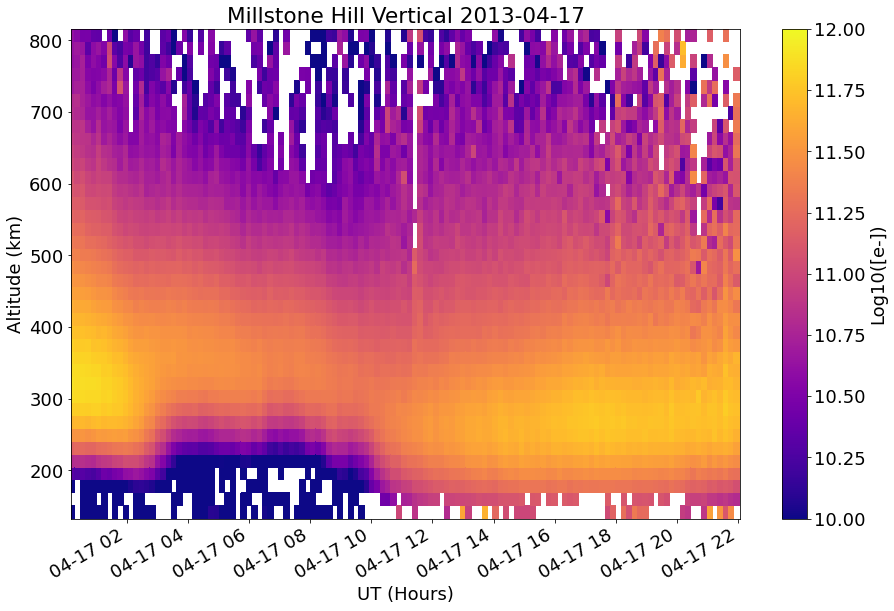

In [14]:
# Make figure
pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
pylab.figure()
pylab.pcolor(Y, X, Z, vmin=10, vmax=12, cmap='plasma')
pylab.colorbar(label='Log10([e-])')
pylab.ylabel('Altitude (km)')
pylab.xlabel('UT (Hours)')
pylab.title('Millstone Hill Vertical %s' % (dut[0].strftime('%Y-%m-%d')))
pylab.gcf().autofmt_xdate()

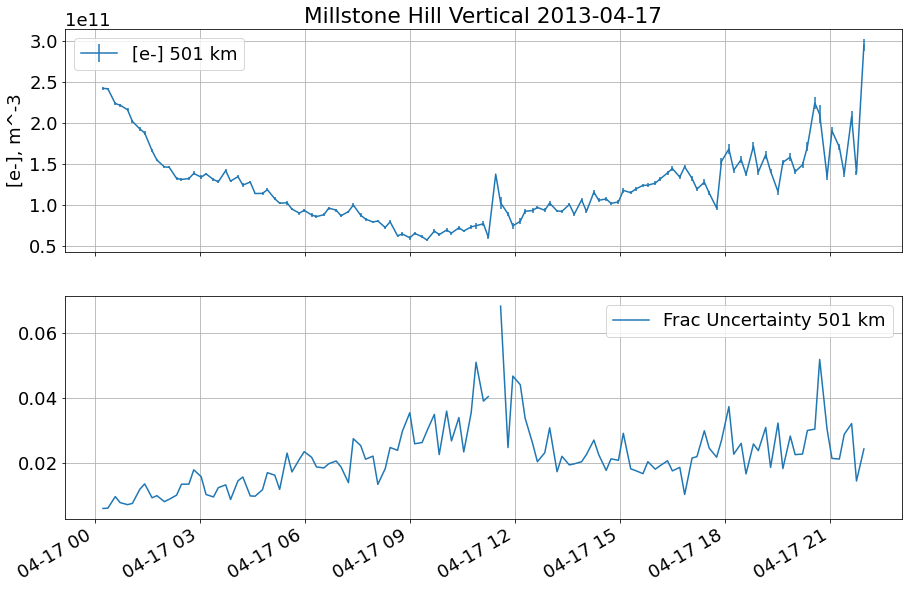

In [15]:
# Make line plot of electron density at about 500 km altitude, with uncertainties

tcount = len(set(ut))
Y = numpy.array(dut)
Y = Y.reshape(tcount,-1)
Z = hztl['ne']
Z = Z.reshape(X.shape)
dZ = hztl['dne']
dZ = dZ.reshape(X.shape)

indx = numpy.where(hztl['gdalt'] >= 500)[0][0]

pylab.rcParams['figure.figsize']=(15,10)
pylab.rcParams['font.size']=18
f, ax = pylab.subplots(2,1,sharex=True)

ax[0].errorbar(Y[:,indx], Z[:,indx], dZ[:,indx], label='[e-] %.0f km' % (hztl['gdalt'][indx]))
ax[0].set_ylabel('[e-], m^-3')
ax[0].set_title('Millstone Hill Vertical %s' % (dut[0].strftime('%Y-%m-%d')))

ax[1].plot(Y[:,indx], dZ[:,indx]/Z[:,indx], label='Frac Uncertainty %.0f km' % (hztl['gdalt'][indx]))
for k in range(2):
    ax[k].grid()
    ax[k].legend()

f.autofmt_xdate()

# Questions

1. Why does the electron density increase after 11 UT?  What other parameter might you examine to confirm your conclusion?

2. What might cause the variations in electron density between 04 and 10 UT? (Remember to check magnetic activity on this day.)

3. How might you change the visualization to enhance the variations seen between 04 and 10 UT?

4. Is the spike in electron density at 11-12 UT physical or instrumental?  Why?